# Lab 1: Exploring Table Data

## 1. Business Understanding

Mining activity has always posed a potential risk to the miners as a result of seismic activity, these risks are often referred to as mining hazards. It is difficult to detect these types of natural hazards, but due to advancements in technology with seismic/seismoacoustic monitoring we are better able to predict these events. 

This data set recorded the energy of seismic bumps in a Polish coal mine in 2013 and it was uploaded to the UCI Machine Learning Repository. It consists of 2584 instances with 19 multivariate attributes, composed of numeric and categorical data types. Each row includes information regarding seismic activity within a single shift (8 hours).

Utilizing this data with machine learning models will enable scientists and other professionals to predict, as accurately as possible, hazardous seismic activity before it occurs, which will potentially save lives. Mining companies would benefit from this tool by being able to predict these events and put procedures into place to safely evacuate employees from a hazardous area. 

Link to the dataset: https://archive.ics.uci.edu/dataset/266/seismic+bumps

## 2. Data Understanding

### 2.1 Data Types

The dataset consists of 19 attributes, below are the descriptions of the attributes as provided by UCI Machine Learning Repository:
1. **seismic**: result of shift seismic hazard assessment in the mine obtained by the seismic 
method (a=lack of hazard, b=low hazard, c=high hazard, d=danger state)
2. **seismoacoustic**: result of shift seismic hazard assessment in the mine working obtained by the 
seismoacoustic method
3. **shift**: information about the type of shift (W=coal-getting, N=preparation shift)
4. **genergy**: seismic energy recorded within previous shift by the most active geophone (GMax) out of 
geophones monitoring the longwall. Geophones are acoustic devices that record ground vibrations caused by seismic waves.
5. **gpuls**: the number of pulses recorded within previous shift by GMax
6. **gdenergy**: the deviation of energy recorded within the previous shift by GMax from the average energy recorded 
from the eight previous shifts
7. **gdpuls**: the deviation of a number of pulses recorded within the previous shift by GMax from average number 
of pulses recorded during eight previous shifts
8. **ghazard**: result of a shift seismic hazard assessment in the mine obtained by the seismoacoustic method based on data from GMax only
9. **nbumps**: the number of seismic bumps recorded within previous shift
10. **nbumps2**: the number of seismic bumps (in energy range [10^2,10^3]) registered within previous shift
11. **nbumps3**: the number of seismic bumps (in energy range [10^3,10^4]) registered within previous shift
12. **nbumps4**: the number of seismic bumps (in energy range [10^4,10^5]) registered within previous shift
13. **nbumps5**: the number of seismic bumps (in energy range [10^5,10^6]) registered within the last shift
14. **nbumps6**: the number of seismic bumps (in energy range [10^6,10^7]) registered within previous shift
15. **nbumps7**: the number of seismic bumps (in energy range [10^7,10^8]) registered within previous shift
16. **nbumps89**: the number of seismic bumps (in energy range [10^8,10^10]) registered within previous shift
17. **energy**: total energy from seismic bumps within previous shift
18. **maxenergy**: the maximum energy of the seismic bumps registered within previous shift
19. **class**: the decision label - '1' indicates that a high energy seismic bump occurred in the next shift 
(hazardous state), '0' indicates that no high energy seismic bumps occurred in the next shift (non-hazardous state)


In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff

data = arff.loadarff('data/seismic-bumps.arff')

df = pd.DataFrame(data[0])

# Convert the byte strings to normal strings
df['seismic'] = df['seismic'].str.decode('utf-8')
df['seismoacoustic'] = df['seismoacoustic'].str.decode('utf-8')
df['shift'] = df['shift'].str.decode('utf-8')
df['ghazard'] = df['ghazard'].str.decode('utf-8')
df['class'] = df['class'].str.decode('utf-8')

df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180.0,48.0,-72.0,-72.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,a,a,N,14720.0,33.0,-70.0,-79.0,a,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2000.0,2000.0,0
2,a,a,N,8050.0,30.0,-81.0,-78.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,a,a,N,28820.0,171.0,-23.0,40.0,a,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,0
4,a,a,N,12640.0,57.0,-63.0,-52.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Originally the object type columns were stored as byte strings, for example, b'a'. Using the decode function this extra 'b' was removed

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   seismic         2584 non-null   object 
 1   seismoacoustic  2584 non-null   object 
 2   shift           2584 non-null   object 
 3   genergy         2584 non-null   float64
 4   gpuls           2584 non-null   float64
 5   gdenergy        2584 non-null   float64
 6   gdpuls          2584 non-null   float64
 7   ghazard         2584 non-null   object 
 8   nbumps          2584 non-null   float64
 9   nbumps2         2584 non-null   float64
 10  nbumps3         2584 non-null   float64
 11  nbumps4         2584 non-null   float64
 12  nbumps5         2584 non-null   float64
 13  nbumps6         2584 non-null   float64
 14  nbumps7         2584 non-null   float64
 15  nbumps89        2584 non-null   float64
 16  energy          2584 non-null   float64
 17  maxenergy       2584 non-null   f

The categorical attributes are stored as objects which is also acceptable since they are nominal features. The numerical attributes are stored as float64's since they are continuous variables regarding energy, pulse, and counts of seismic bumps.

In [53]:
df.describe().round(2)

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy
count,2584.00,2584.00,2584.00,2584.00,2584.00,2584.00,2584.00,2584.00,2584.00,2584.0,2584.0,2584.0,2584.00,2584.00
mean,90242.52,538.58,12.38,4.51,0.86,0.39,0.39,0.07,0.00,0.0,0.0,0.0,4975.27,4278.85
std,229200.51,562.65,80.32,63.17,1.36,0.78,0.77,0.28,0.07,0.0,0.0,0.0,20450.83,19357.45
min,100.00,2.00,-96.00,-96.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00
25%,11660.00,190.00,-37.00,-36.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00
50%,25485.00,379.00,-6.00,-6.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00
75%,52832.50,669.00,38.00,30.25,1.00,1.00,1.00,0.00,0.00,0.0,0.0,0.0,2600.00,2000.00
max,2595650.00,4518.00,1245.00,838.00,9.00,8.00,7.00,3.00,1.00,0.0,0.0,0.0,402000.00,400000.00


### 2.2 Data Quality

As per the above dataframe information, each attribute has 2584 entries, which is the length of the dataset. This indicates there is no missing data, and based on the description of the dataframe there do not appear to be any extreme outliers. Due to the nature of the data, it is necessary to include seemingly outlier data points, such as high values in seismic energy or number of pulses, which are expected during hazardous events that we are trying to predict. There are also instances such as in *nbumps* where it is acceptable to have a zero value since it is important to note both the presence and absence of seismic bumps. 

<Axes: >

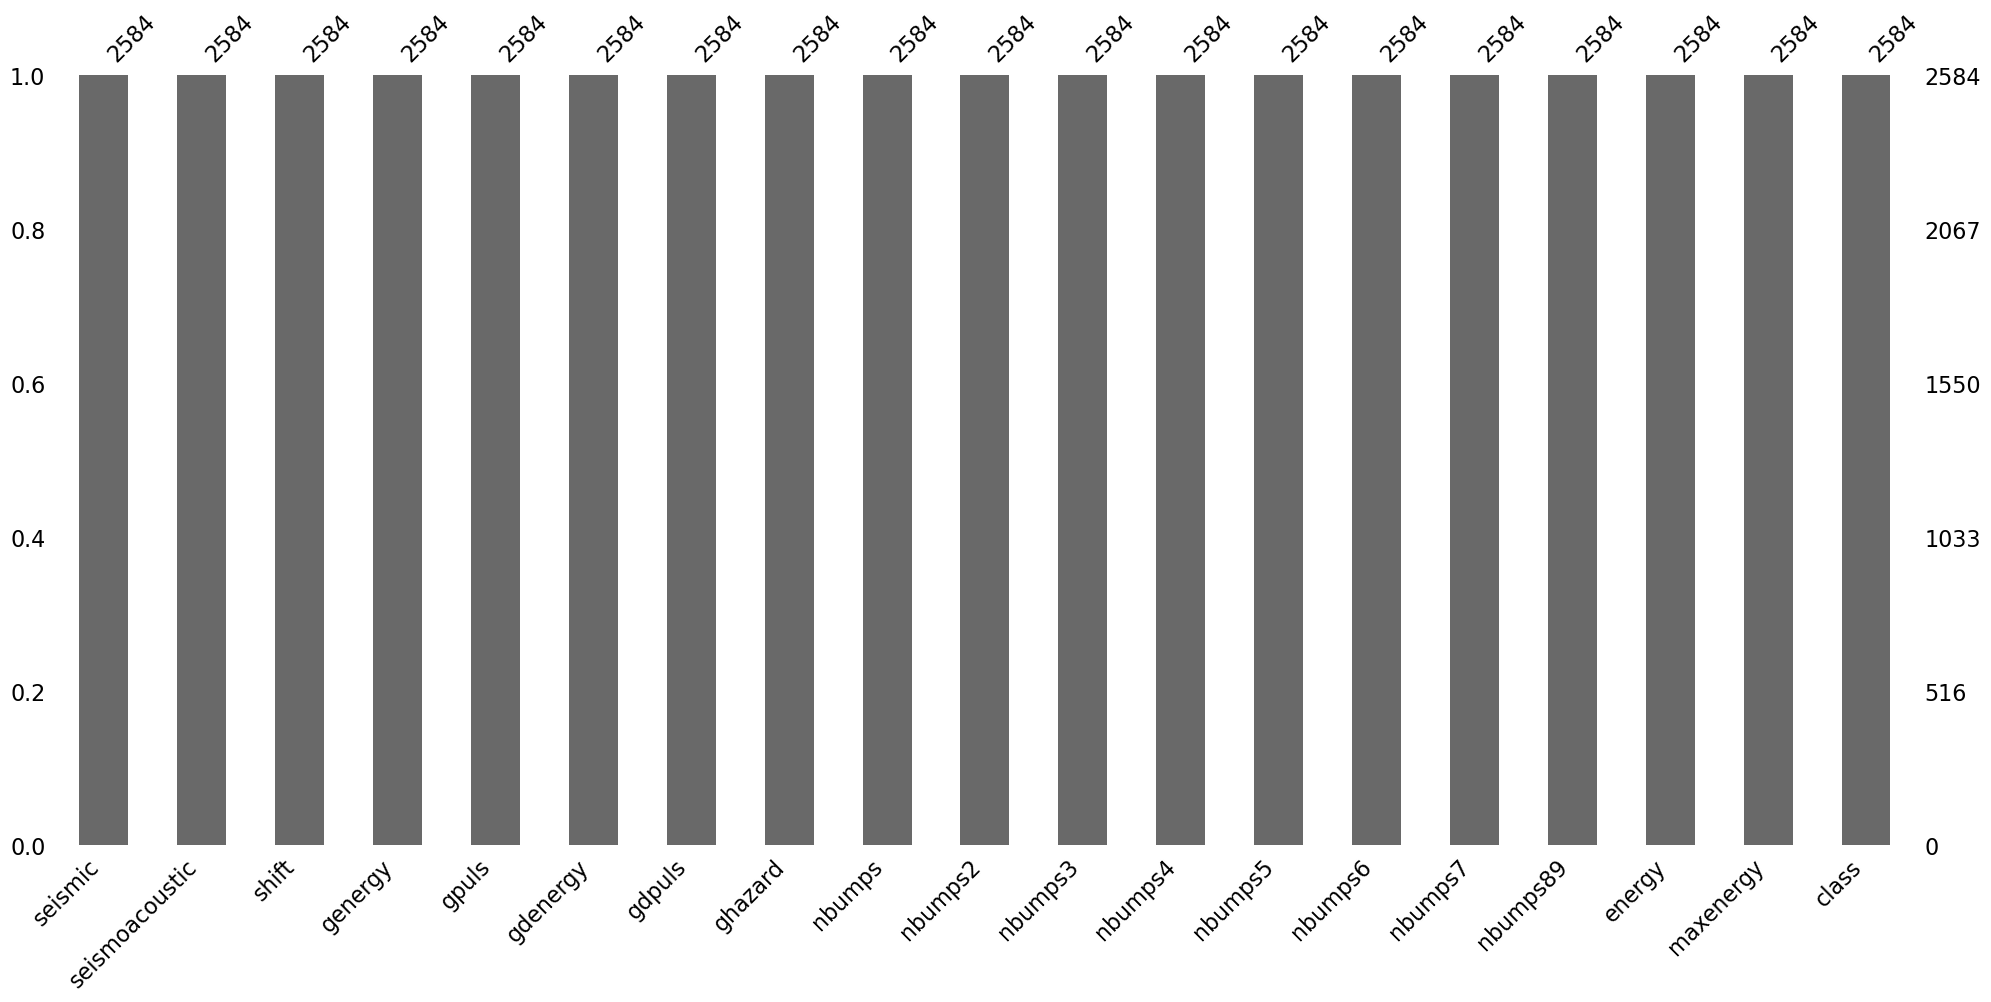

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
import missingno as mn

warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

mn.bar(df)

In [5]:
# double checking for missing data
print ("===Missing Data===")
print(df.isnull().sum())

# check for duplicates
print("===Duplicate Data===")
print(df.duplicated().sum())

===Missing Data===
seismic           0
seismoacoustic    0
shift             0
genergy           0
gpuls             0
gdenergy          0
gdpuls            0
ghazard           0
nbumps            0
nbumps2           0
nbumps3           0
nbumps4           0
nbumps5           0
nbumps6           0
nbumps7           0
nbumps89          0
energy            0
maxenergy         0
class             0
dtype: int64
===Duplicate Data===
6


In [6]:
# show duplicate rows
print("===Duplicate Rows===")
print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())

===Duplicate Rows===
     seismic seismoacoustic shift  genergy  gpuls  gdenergy  gdpuls ghazard  \
1015       a              a     N    590.0   11.0     -74.0   -72.0       a   
1017       a              a     N    590.0   11.0     -74.0   -72.0       a   
1016       a              a     N   3720.0   43.0      75.0     8.0       a   
1018       a              a     N   3720.0   43.0      75.0     8.0       a   
87         a              a     N  63550.0  325.0      15.0    35.0       a   

      nbumps  nbumps2  nbumps3  nbumps4  nbumps5  nbumps6  nbumps7  nbumps89  \
1015     0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
1017     0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
1016     0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
1018     0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
87       0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   

      energy  maxenergy

*- explain duplicates*

## 3. Data Visualization


### 3.1 Feature Distributions


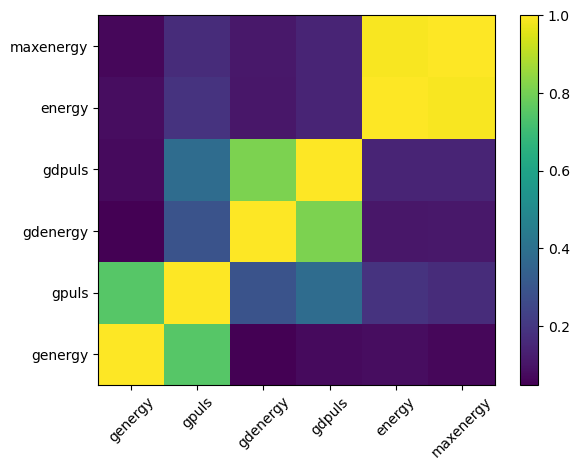

In [51]:
# make correlation matrix

variables = ['genergy', 'gpuls', 'gdenergy', 'gdpuls', 'energy', 'maxenergy']
plt.pcolor(df[variables].corr())

plt.yticks(np.arange(.5, len(variables), 1), variables, fontsize=10)
plt.xticks(np.arange(.5, len(variables), 1), variables, rotation=45, fontsize=10)
plt.colorbar()
plt.show()

Based on the correlation matrix, it is clear that there are only positive correlations among these variables. The strongest correlations are seen between the number of pulses and the seismic energy, and between these deviations of each of this attributes. This indicates that as more pulses are seen in a shift, there is also higher seismic energy, which is expected since pulses cause tremors in the earth which are recorded as seismic energy.

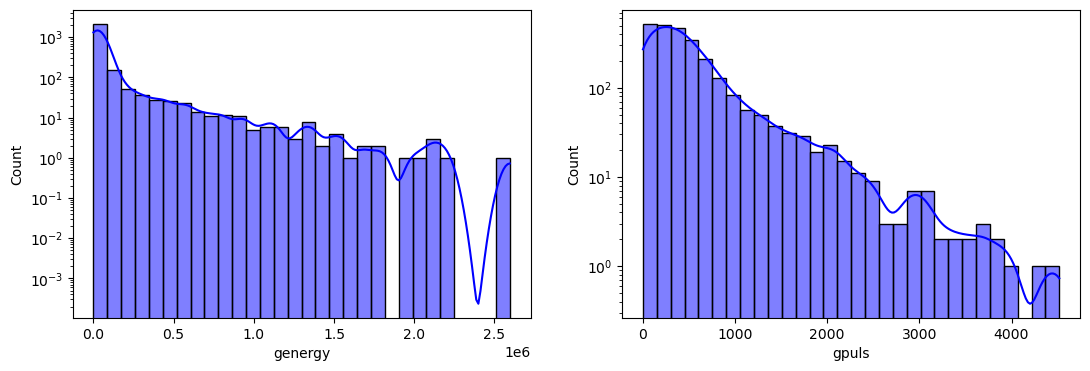

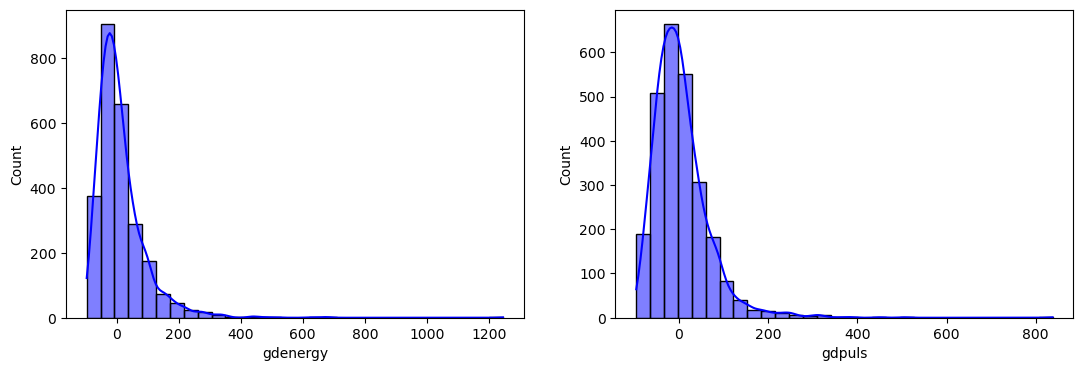

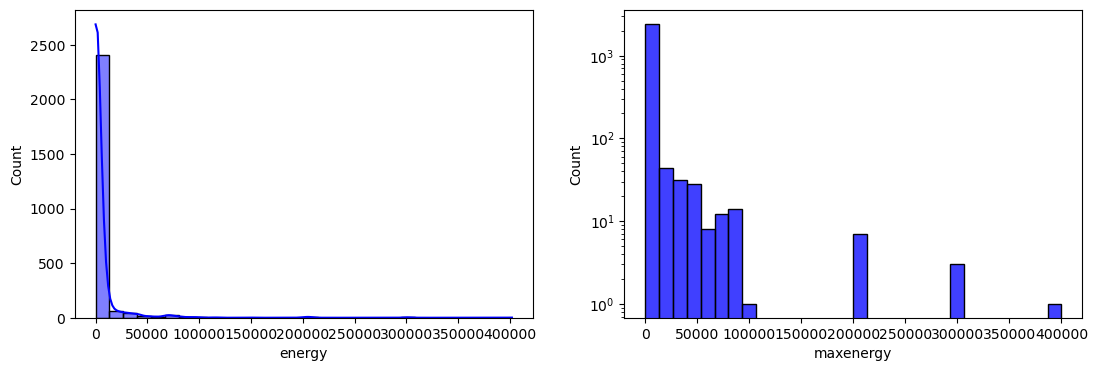

In [95]:
import seaborn as sns

plt.figure(figsize=(13,4))

plt.subplot(1,2,1)
sns.histplot(df.genergy, kde=True, log_scale=(False,True), color='blue', bins=30)

plt.subplot(1,2,2)
sns.histplot(df.gpuls, kde=True, log_scale=(False,True), color='blue', bins=30)

plt.figure(figsize=(13,4))

plt.subplot(1,2,1)
sns.histplot(df.gdenergy, kde=True, color='blue', bins=30)

plt.subplot(1,2,2)
sns.histplot(df.gdpuls, kde=True, color='blue', bins=30)

plt.figure(figsize=(13,4))

plt.subplot(1,2,1)
sns.histplot(df.energy, kde=True, color='blue', bins=30)

plt.subplot(1,2,2)
#make boxplot with the yscale logarithmic
sns.histplot(df.maxenergy, color='blue', bins=30)
plt.yscale('log')

*Discuss here*

([<matplotlib.axis.XTick at 0x21105beb2e0>,
 [Text(0, 0, 'lack of hazard'),
  Text(1, 0, 'low hazard'),
  Text(2, 0, 'high hazard')])

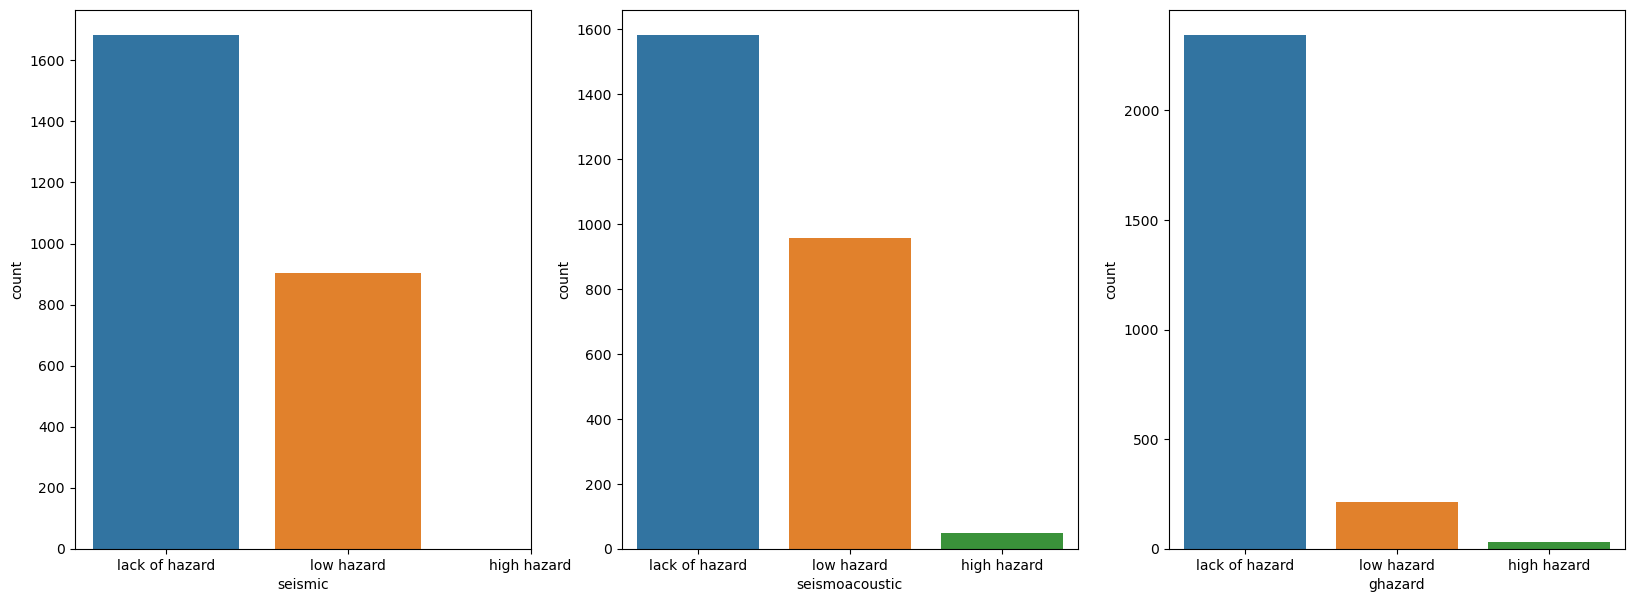

In [42]:
plt.subplots(figsize=(20, 7))

plt.subplot(1,3,1)
sns.countplot(x='seismic', data=df)
plt.xticks([0,1,2], ['lack of hazard', 'low hazard', 'high hazard'])

plt.subplot(1,3,2)
sns.countplot(x='seismoacoustic', data=df)
plt.xticks([0,1,2], ['lack of hazard', 'low hazard', 'high hazard'])

plt.subplot(1,3,3)
sns.countplot(x='ghazard', data=df)
plt.xticks([0,1,2], ['lack of hazard', 'low hazard', 'high hazard'])

*Discuss here*

### 3.2 Questions

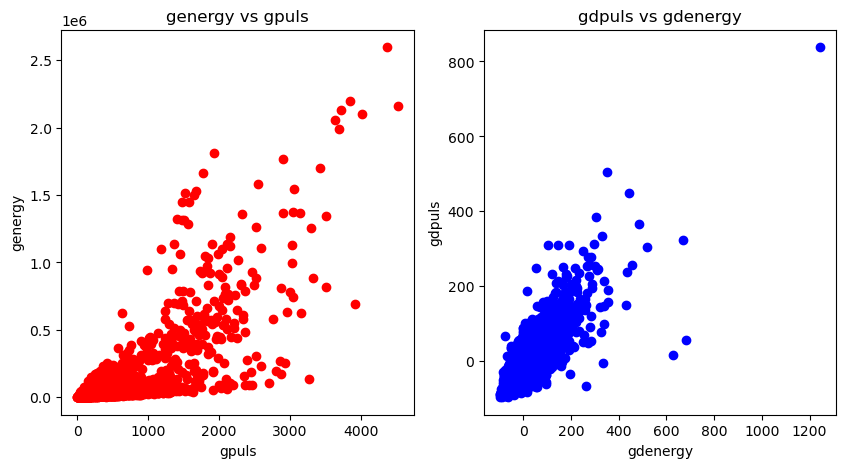

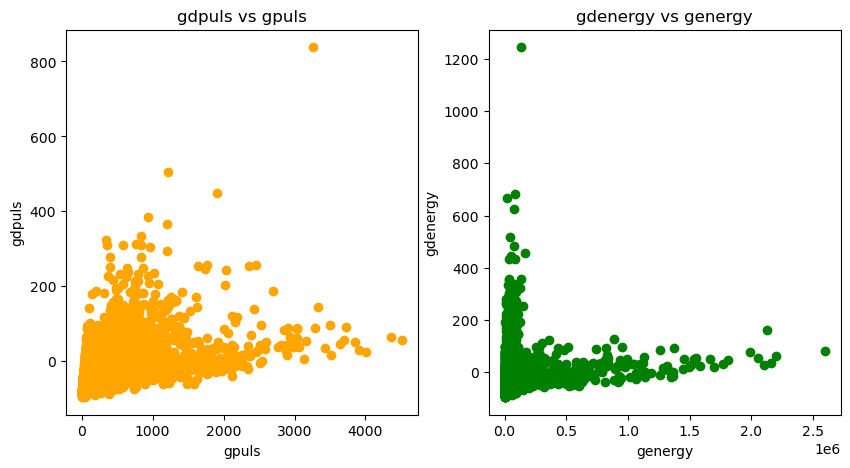

In [8]:
# illustrate relationship between gpuls and genergy, might get rid of this

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(df['gpuls'], df['genergy'], color='red')
ax[0].set_xlabel('gpuls')
ax[0].set_ylabel('genergy')
ax[0].title.set_text('genergy vs gpuls')

ax[1].scatter(df['gdenergy'], df['gdpuls'], color='blue')
ax[1].set_xlabel('gdenergy')
ax[1].set_ylabel('gdpuls')
ax[1].title.set_text('gdpuls vs gdenergy')

plt.show()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(df['gpuls'], df['gdpuls'], color='orange')
ax[0].set_xlabel('gpuls')
ax[0].set_ylabel('gdpuls')
ax[0].title.set_text('gdpuls vs gpuls')

ax[1].scatter(df['genergy'], df['gdenergy'], color='green')
ax[1].set_xlabel('genergy')
ax[1].set_ylabel('gdenergy')
ax[1].title.set_text('gdenergy vs genergy')

plt.show()


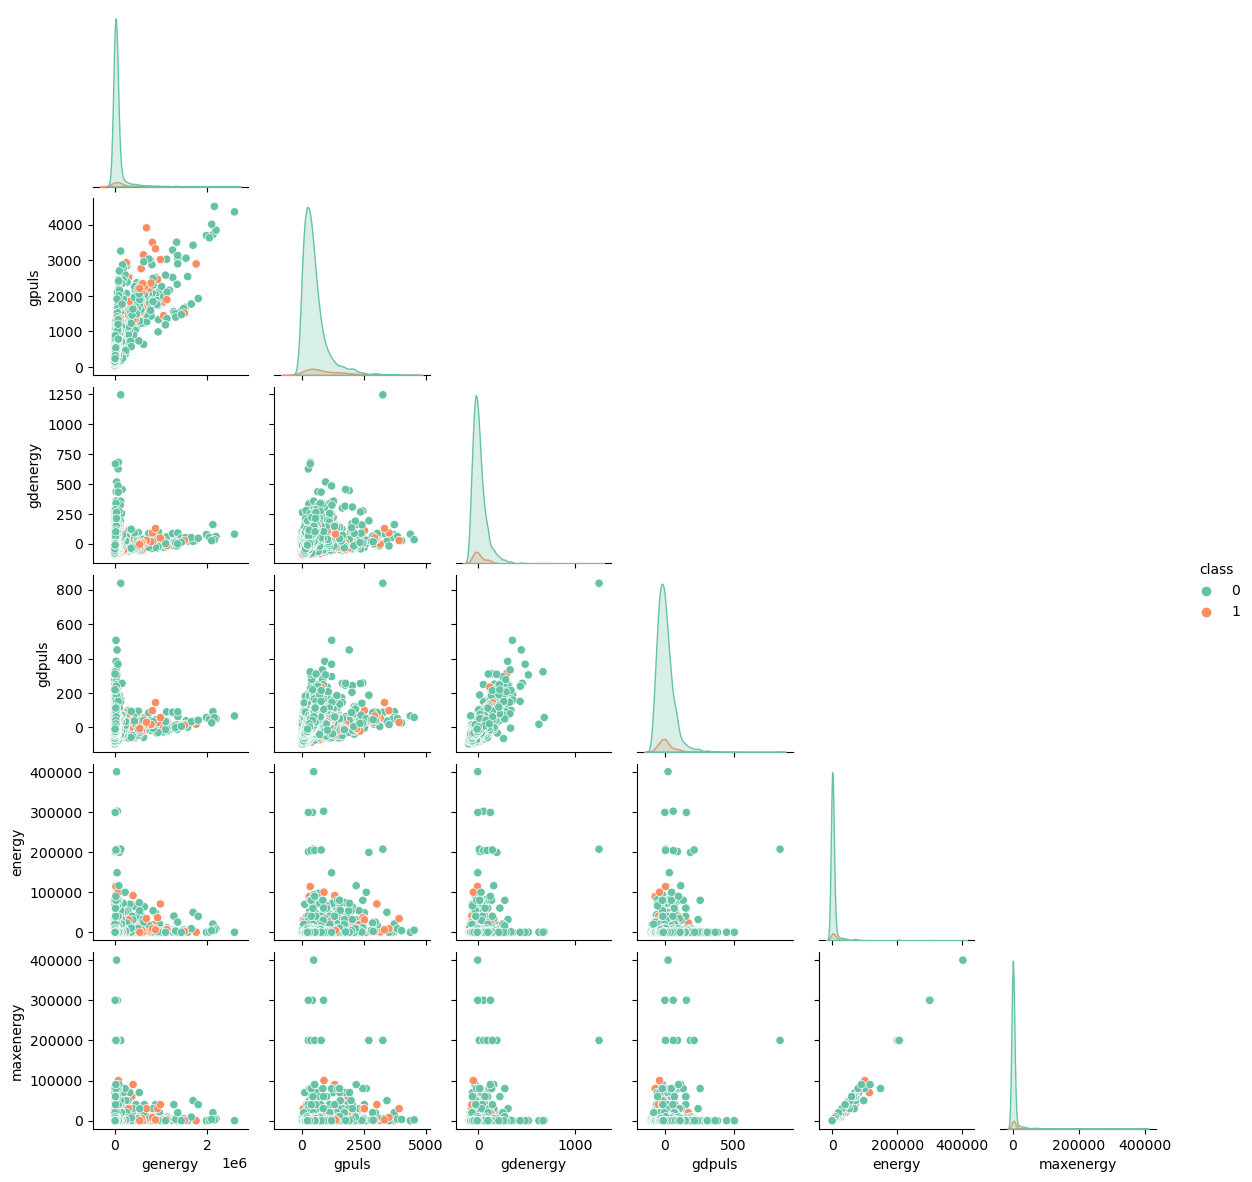

In [23]:
variables = ['genergy', 'gpuls', 'gdenergy', 'gdpuls', 'energy', 'maxenergy', 'class']
sns.pairplot(df[variables], hue='class', palette='Set2', diag_kind='kde', height=2,
             kind='scatter', corner=True)

## 4. UMAP Dimensionality Reduction

c:\Users\leila\anaconda3\envs\mlenv2023\lib\site-packages\umap\plot.py:203: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\leila\anaconda3\envs\mlenv2023\lib\site-packages\umap\plot.py:448: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


<Axes: >

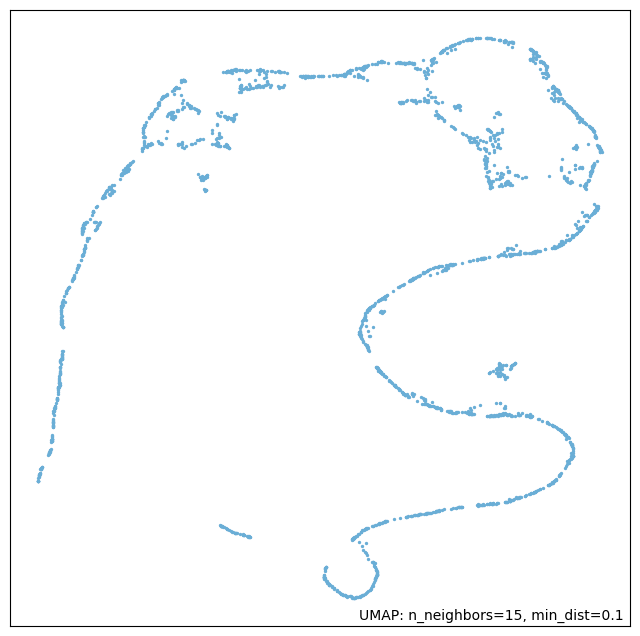

In [46]:
import umap
import umap.plot

# mapper = umap.UMAP().fit(df[variables])
# umap.plot.points(mapper)